<a href="https://colab.research.google.com/github/chooikeenyu/Juice_CapstoneProject/blob/main/JuiceCapstoneProjectTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Read Training Data**

In [185]:
from google.colab import files
uploaded = files.upload()
import io
hD1 = pd.read_csv(io.BytesIO(uploaded['cleveland.csv']),header=None)

Saving cleveland.csv to cleveland (1).csv


In [186]:
hD1.head(10)

,0
0,1 0 63 1 -9 -9 -9
1,-9 1 145 1 233 -9 50 20
2,1 -9 1 2 2 3 81 0
3,0 0 0 0 1 10.5 6 13
4,150 60 190 90 145 85 0 0
5,2.3 3 -9 172 0 -9 -9 -9
6,-9 -9 -9 6 -9 -9 -9 2
7,16 81 0 1 1 1 -9 1
8,-9 1 -9 1 1 1 1 1
9,1 1 -9 -9 name


**Preprocessing The Data**


From the data source, we know that the each data tuple is until the feature's value is 'name'. Therefore, we need to rearrange the data.

In [187]:
import pandas as pd
pd.set_option("display.max_rows",None,"display.max_columns",None)
import math

# read file
data = hD1

processData = []    # array to store processed data
tempArray = []      # temporary array to store data until 'name'

# loop every line of data
for line in range(len(data)):
    newData = ''                # store data until whitespace is read
    tempLine = data[0][line]    # temporary array of current line of data

    if not tempLine:
        continue

    try:
        # loop every character in line
        for i in range(len(tempLine)):

            # add character to newData if the character is not whitespace
            if (tempLine[i] != ' '):
                newData = newData + tempLine[i]

            # else if character is whitespace, add data to array and clear newData
            else:
                tempArray.append(newData)
                newData = ''

                # if the data is 'name', then store array to processData
                # then clear tempArray
                if (newData == 'name'):
                    processData.append(tempArray)
                    tempArray = []

        # last data is not store from last loop
        # so this will add last data to array if newData is not null
        if (newData != ''):
            tempArray.append(newData)

            # if the data is 'name', then store array to processData
            # then clear tempArray
            if (newData == 'name'):
                processData.append(tempArray)
                tempArray = []

    # if line is empty, read next line
    except TypeError:
        continue

In [188]:
df = pd.DataFrame(processData)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431
0,1,0,63,1,-9,-9,-9,-9,1,145,1,233,-9,50,20,1,-9,1,2,2,3,81,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,-9,172,0,-9,-9,-9,-9,-9,-9,6,-9,-9,-9,2,16,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,0,67,1,-9,-9,-9,-9,4,160,1,286,-9,40,40,0,-9,1,2,3,5,81,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,-9,185,3,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,5,81,2,1,2,2,-9,2,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

The data contains only 76 features, so we drop the column that beyond it

In [189]:
df.drop(df.columns[76:],axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,1,233,-9,50,20,1,-9,1,2,2,3,81,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,-9,172,0,-9,-9,-9,-9,-9,-9,6,-9,-9,-9,2,16,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,1,286,-9,40,40,0,-9,1,2,3,5,81,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,-9,185,3,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,5,81,2,1,2,2,-9,2,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,1,229,-9,20,35,0,-9,1,2,2,19,81,0,1,0,0,0,1,8.5,6,10,129,78,140,80,120,80,1,0,2.6,2,-9,150,2,-9,-9,-9,-9,-9,-9,7,-9,-9,-9,2,20,81,1,1,1,1,-9,1,-9,1,-9,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,0,250,-9,0,0,0,-9,1,0,2,13,81,0,1,0,0,0,1,13,13,17,187,84,195,68,130,78,0,0,3.5,3,-9,167,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,4,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,1,204,-9,0,0,0,-9,1,2,2,7,81,0,0,0,0,0,1,7,-9,9,172,71,160,74,130,86,0,0,1.4,1,-9,40,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,18,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       293 non-null    object
 1   1       293 non-null    object
 2   2       291 non-null    object
 3   3       290 non-null    object
 4   4       290 non-null    object
 5   5       290 non-null    object
 6   6       290 non-null    object
 7   7       290 non-null    object
 8   8       290 non-null    object
 9   9       290 non-null    object
 10  10      290 non-null    object
 11  11      289 non-null    object
 12  12      289 non-null    object
 13  13      288 non-null    object
 14  14      288 non-null    object
 15  15      288 non-null    object
 16  16      288 non-null    object
 17  17      288 non-null    object
 18  18      288 non-null    object
 19  19      288 non-null    object
 20  20      288 non-null    object
 21  21      288 non-null    object
 22  22      288 non-null    ob

In [191]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
count,293,293,291,290,290,290,290,290,290,290,290,289,289,288,288,288,288,288,288,288,288,288,288,288,288,288,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286
unique,286,9,49,6,6,5,5,5,8,53,6,151,5,26,41,6,6,7,8,15,34,9,7,6,7,6,6,3,68,35,21,94,64,62,44,52,34,5,6,40,6,4,119,7,4,4,3,2,4,3,6,3,4,5,14,33,6,6,5,5,4,3,4,4,6,5,4,5,4,4,11,11,6,4,3,5
top,23,0,54,1,-9,-9,-9,-9,4,120,1,204,-9,0,0,0,-9,1,2,1,20,82,0,0,0,0,0,1,9,-9,10,162,70,160,80,120,80,0,0,0,1,-9,110,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,1,21,82,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
freq,3,283,16,194,284,284,284,286,134,34,174,6,282,115,115,240,261,175,142,40,13,96,271,186,212,252,248,285,31,70,42,11,10,28,53,34,64,190,276,92,136,284,11,166,283,283,284,285,283,284,160,284,283,282,35,14,97,158,271,243,226,284,240,282,236,282,235,247,283,282,272,257,250,283,283,282


Changing the columns name that is referenced in the UCI ML repository website

In [192]:
df.columns = ["id","ccf","age","sex","painloc","painexer","relrest","pncaden","cp","trestbps","htn","chol","smoke","cigs","years",
           "fbs","dm","famhist","restecg","ekgmo","ekgday","ekgyr","dig","prop","nitr","pro","diuretic","proto","thaldur",
           "thaltime","met","thalach","thalrest","tpeakbps","tpeakbpd","dummy","trestbpd","exang","xhypo","oldpeak","slope",
           "rldv5","rldv5e","Ca","restckm","exerckm","restef","restwm","exeref","exerwm","thal","thalsev","thalpul","earlobe",
           "cmo","cday","cyr","num","lmt","ladprox","laddist","diag","cxmain","ramus","om1","om2","rcaprox","rcadist","lvx1",
           "lvx2","lvx3","lvx4","Lvf","cathef","junk","name"]

In [193]:
df.describe()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,Ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,Lvf,cathef,junk,name
count,293,293,291,290,290,290,290,290,290,290,290,289,289,288,288,288,288,288,288,288,288,288,288,288,288,288,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286
unique,286,9,49,6,6,5,5,5,8,53,6,151,5,26,41,6,6,7,8,15,34,9,7,6,7,6,6,3,68,35,21,94,64,62,44,52,34,5,6,40,6,4,119,7,4,4,3,2,4,3,6,3,4,5,14,33,6,6,5,5,4,3,4,4,6,5,4,5,4,4,11,11,6,4,3,5
top,23,0,54,1,-9,-9,-9,-9,4,120,1,204,-9,0,0,0,-9,1,2,1,20,82,0,0,0,0,0,1,9,-9,10,162,70,160,80,120,80,0,0,0,1,-9,110,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,1,21,82,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
freq,3,283,16,194,284,284,284,286,134,34,174,6,282,115,115,240,261,175,142,40,13,96,271,186,212,252,248,285,31,70,42,11,10,28,53,34,64,190,276,92,136,284,11,166,283,283,284,285,283,284,160,284,283,282,35,14,97,158,271,243,226,284,240,282,236,282,235,247,283,282,272,257,250,283,283,282


From the description above, the columns ID, Ccf and name are not meaningful to the prediction of heart disease so we decided to drop these columns

In [194]:
df = df.drop(columns = ["id","ccf","name"])
df.head()

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,Ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,Lvf,cathef,junk
0,63,1,-9,-9,-9,-9,1,145,1,233,-9,50,20,1,-9,1,2,2,3,81,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,-9,172,0,-9,-9,-9,-9,-9,-9,6,-9,-9,-9,2,16,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9
1,67,1,-9,-9,-9,-9,4,160,1,286,-9,40,40,0,-9,1,2,3,5,81,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,-9,185,3,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,5,81,2,1,2,2,-9,2,-9,1,-9,1,1,1,1,1,1,1,-9,-9
2,67,1,-9,-9,-9,-9,4,120,1,229,-9,20,35,0,-9,1,2,2,19,81,0,1,0,0,0,1,8.5,6,10,129,78,140,80,120,80,1,0,2.6,2,-9,150,2,-9,-9,-9,-9,-9,-9,7,-9,-9,-9,2,20,81,1,1,1,1,-9,1,-9,1,-9,2,2,1,1,1,7,3,-9,-9
3,37,1,-9,-9,-9,-9,3,130,0,250,-9,0,0,0,-9,1,0,2,13,81,0,1,0,0,0,1,13,13,17,187,84,195,68,130,78,0,0,3.5,3,-9,167,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,4,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9
4,41,0,-9,-9,-9,-9,2,130,1,204,-9,0,0,0,-9,1,2,2,7,81,0,0,0,0,0,1,7,-9,9,172,71,160,74,130,86,0,0,1.4,1,-9,40,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,18,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9


**Checking for null values**

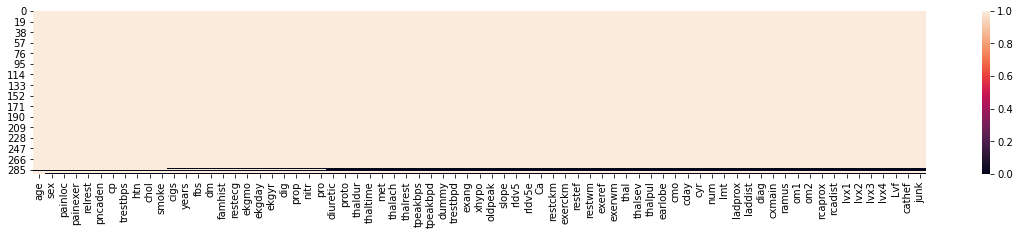

In [195]:
plt.figure(figsize = (20,3))
sns.heatmap(df.notna())
plt.show()

The plot shows that there is some missing value in the lowest part of the dataset

In [196]:
df.isnull().sum()

age         2
sex         3
painloc     3
painexer    3
relrest     3
pncaden     3
cp          3
trestbps    3
htn         3
chol        4
smoke       4
cigs        5
years       5
fbs         5
dm          5
famhist     5
restecg     5
ekgmo       5
ekgday      5
ekgyr       5
dig         5
prop        5
nitr        5
pro         5
diuretic    6
proto       6
thaldur     6
thaltime    6
met         6
thalach     6
thalrest    6
tpeakbps    6
tpeakbpd    6
dummy       6
trestbpd    6
exang       6
xhypo       6
oldpeak     6
slope       6
rldv5       6
rldv5e      6
Ca          6
restckm     7
exerckm     7
restef      7
restwm      7
exeref      7
exerwm      7
thal        7
thalsev     7
thalpul     7
earlobe     7
cmo         7
cday        7
cyr         7
num         7
lmt         7
ladprox     7
laddist     7
diag        7
cxmain      7
ramus       7
om1         7
om2         7
rcaprox     7
rcadist     7
lvx1        7
lvx2        7
lvx3        7
lvx4        7
Lvf         7
cathef

In [197]:
df[df.isnull().any(axis=1)]

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,Ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,Lvf,cathef,junk
284,0,1,,81,0,1,,,7,17,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
285,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
286,,15,1,1,-9,-9,-9,-9,-7,2449494811,1,12,1282,12822-9,-9,-9,3,-0,1450,14505,8626,84,--9,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
287,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
288,86554,1,2,0,3,-9,5-9,5--9,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
290,8229,8223,13,0,0,0,1,70,0,0,1,707,167,16781,481,487,854,1,2,9,12,9,122-9,1,-9,1,-9,2,158,658,655.7,9,3,-9,-99,3,-9,-99,1,-9,-9,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
292,name,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


We found the data rows in the end of our dataset have fewer attributes and do not organised well. Therefore, the missing attributes can't be known and the amount of these data row is small in the dataset, so we decide to drop the rows.

**Dropping irrelevant rows**

In [198]:
df = df.dropna(axis=0,how='any')
df[df.isnull().any(axis=1)]

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,Ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,Lvf,cathef,junk


In [199]:
df.shape[0]

286

There are 286 rows left in our dataset

**Selecting Related Features**

Since our project will be focus on the early detection of heart disease using the wearable, so we decide to drop the features that are not related to the wearable.

In [200]:
df = df[["age","sex","trestbps","smoke","cigs","years", "fbs","dm","famhist","restecg","ekgmo","ekgday","ekgyr","thalach",
         "thalrest","tpeakbps","tpeakbpd","trestbpd","num"]]

**Change all features' datatype to numerical type**

In [201]:
df = df.apply(pd.to_numeric)

In [202]:
df.dtypes

age           int64
sex           int64
trestbps      int64
smoke       float64
cigs          int64
years         int64
fbs           int64
dm            int64
famhist     float64
restecg     float64
ekgmo       float64
ekgday        int64
ekgyr         int64
thalach       int64
thalrest      int64
tpeakbps      int64
tpeakbpd      int64
trestbpd      int64
num           int64
dtype: object

**Data Visualisation**

**Output Variable**

**num**

num is the label in our dataset which is the feature that we want to predict. We notice that the value in the num has value from 0 to 4, so we decide to replace the values which are greater than 0 to 1 which 0 means low risk while 1 means high risk

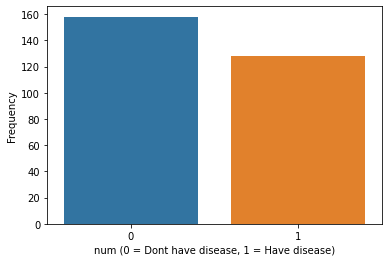

In [203]:
df['num'].values[df['num'].values > 0] = 1
sns.countplot(x='num', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**Continuous Features**

**Checking For Outlier Using Boxplot**

**age**

This feature is about the person's age in years

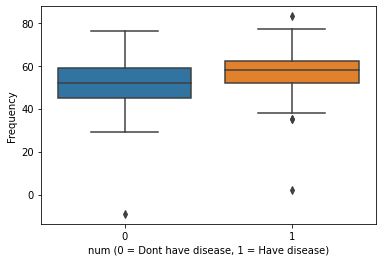

In [204]:
sns.boxplot(x='num', y='age', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

For the boxplot, we can see that there are some outliers in the data which has a number that is below 0 which is impossible to age.



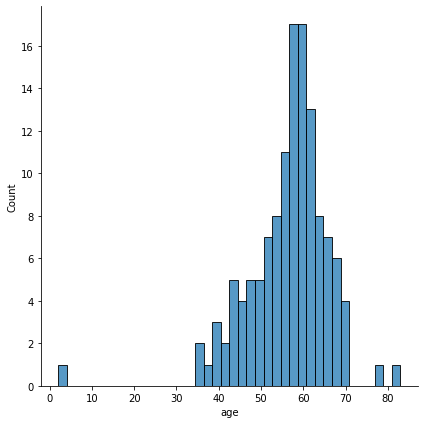

In [205]:
sns.displot(df[df['num']==1]['age'],kde=False,bins=40,height=6)
plt.show()

From the plot above, we can see that the heart disease is very common in the age range 52-65

**trestbps**

This feature is related to resting blood pressure of a person(mm Hg on admission to the hospital)

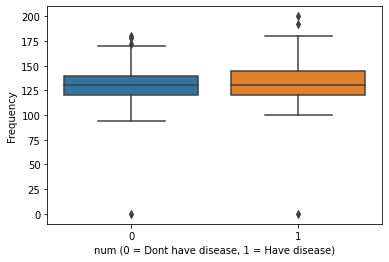

In [206]:
sns.boxplot(x='num', y='trestbps', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**cigs**

The feature is about how many cigarettes a person smoke per day.



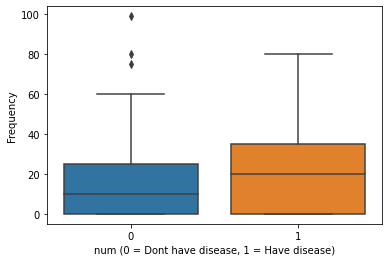

In [207]:
df = df[df['cigs'] >= 0]  
sns.boxplot(x='num', y='cigs', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**years**

The feature is about number of years as a smoker.

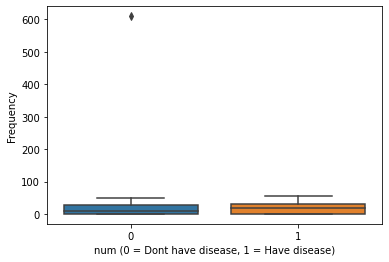

In [208]:
df = df[df['years'] >= 0]  
sns.boxplot(x='num', y='years', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**ekgmo**

This feature is about the person's month of exercise ECG reading.

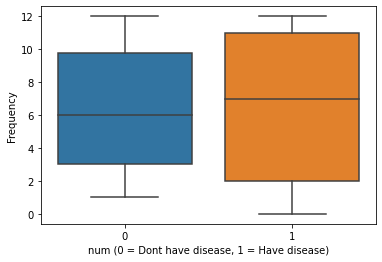

In [209]:
sns.boxplot(x='num', y='ekgmo', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**ekgday**

This feature is about the person's day of exercise ECG reading.

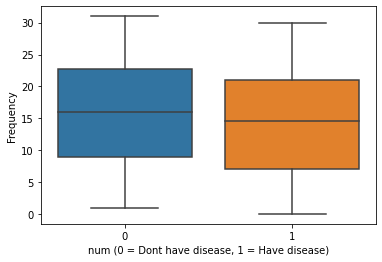

In [210]:
sns.boxplot(x='num', y='ekgday', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**ekgyr**

This feature is about the person's year of exercise ECG reading.

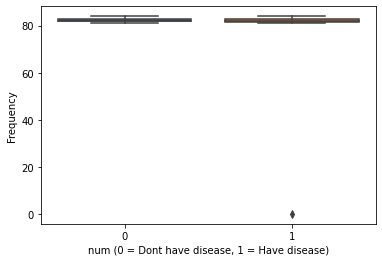

In [211]:
sns.boxplot(x='num', y='ekgyr', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**thalach**

This feature is about the person's maximum heart rate achieved.

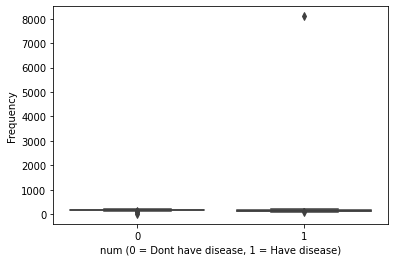

In [212]:
sns.boxplot(x='num', y='thalach', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**thalrest**

This feature is about the person's resting heart rate.

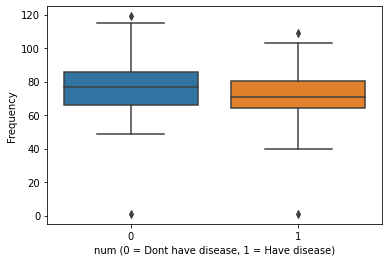

In [213]:
sns.boxplot(x='num', y='thalrest', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**tpeakbps**

This featue is about the person's peak exercise blood pressure (first of 2 parts)

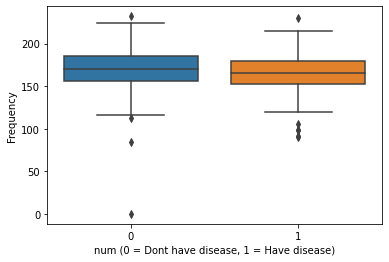

In [214]:
sns.boxplot(x='num', y='tpeakbps', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**tpeakbpd**

This feature is about the person's peak exercise blood pressure (second of 2 parts)

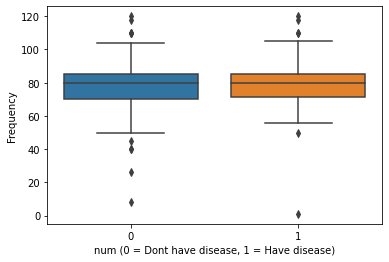

In [215]:
sns.boxplot(x='num', y='tpeakbpd', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**trestbpd**

This feature is about the person's resting blood pressure.

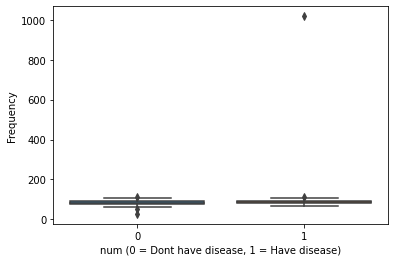

In [216]:
sns.boxplot(x='num', y='trestbpd', data=df)
plt.xlabel('num (0 = Dont have disease, 1 = Have disease)')
plt.ylabel('Frequency')
plt.show()

**Removing Outliers**

In [217]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & 
                       (df_in[col_name] < fence_high)]
    return df_out

In [218]:
df = remove_outlier(df_in = df, col_name = 'age')
df = remove_outlier(df_in = df, col_name = 'sex')
df = remove_outlier(df_in = df, col_name = 'trestbps')
df = remove_outlier(df_in = df, col_name = 'cigs')
df = remove_outlier(df_in = df, col_name = 'years')
df = remove_outlier(df_in = df, col_name = 'ekgyr')
df = remove_outlier(df_in = df, col_name = 'thalach')
df = remove_outlier(df_in = df, col_name = 'thalrest')
df = remove_outlier(df_in = df, col_name = 'tpeakbps')
df = remove_outlier(df_in = df, col_name = 'tpeakbpd')
df = remove_outlier(df_in = df, col_name = 'trestbpd')

In [219]:
df.shape[0]

235

**Correlation Matrix**

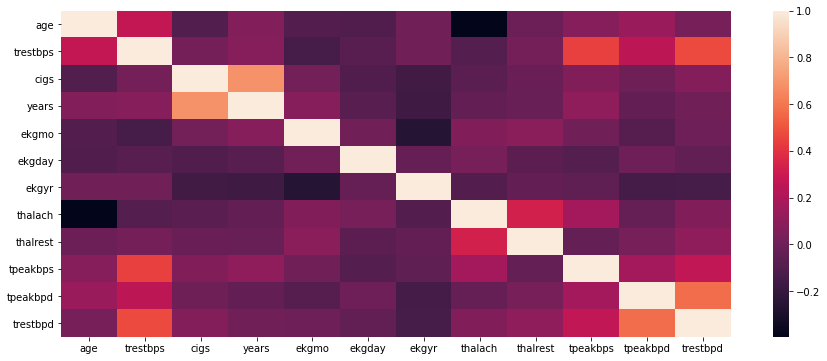

In [220]:
plt.figure(figsize=(15,6))
corr_df=df.corr()
heatmap_df=corr_df.drop(['num','sex','smoke','fbs','dm','famhist','restecg']).drop(['num','sex','smoke','fbs','dm','famhist','restecg'],axis=1)
sns.heatmap(heatmap_df)
plt.show()

From the heatmap, we can know that there are some features are correlated such as cigs and years, tpeakbps and trestbps, trestbpd and trestbps and trestbpd and tpeakbpd. We can drop the features that are correlated but we decided not to do so because all of them give information and important to predict whether the person has heart disease or not.

**Category features**

**sex**

This feature is about the person's sex (1 = male; 0 = female)

From the plot below, male has a higher chance to get heart disease compared to woman

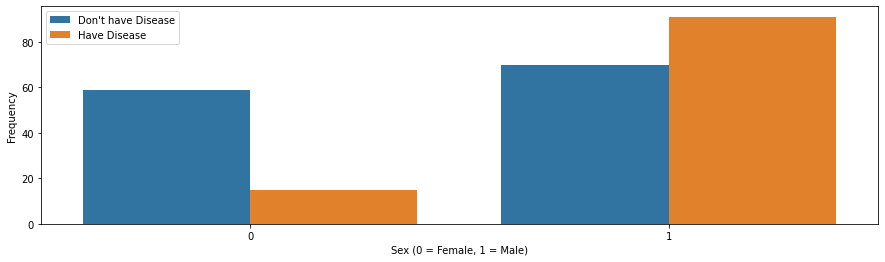

In [221]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='sex', hue='num')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

**smoke**

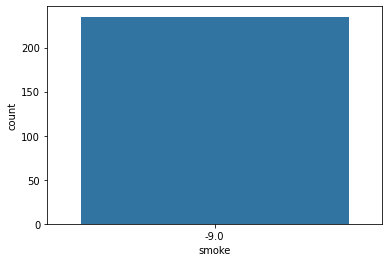

In [222]:
sns.countplot(x='smoke', data=df)
plt.show()

From the barplot, we found that there is a lot of undetermined values which is -9. Therefore, we decide to impute it by using Cigs feature. If the value in Cigs is larger than 0, then the person is a smoker else not a smoker.

In [223]:
df['smoke'].values[df['cigs'].values > 0] = 1
df['smoke'].values[df['cigs'].values == 0] = 0

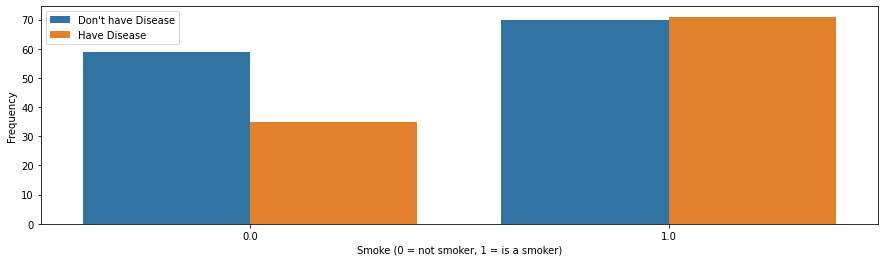

In [224]:
plt.figure(figsize=(15,4))
sns.countplot(x='smoke', hue='num', data=df)
plt.xlabel('Smoke (0 = not smoker, 1 = is a smoker)')
plt.ylabel('Frequency')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

**Relationship between sex and smoke**

From the plot below, most of the man is a smoker and the number of woman is not a smoker is higher than those are smoker.

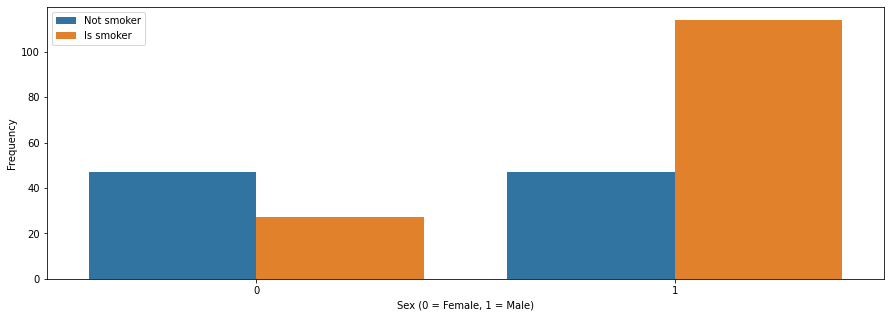

In [225]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='sex', hue='smoke')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(["Not smoker", "Is smoker"])
plt.show()

**fbs**

This feature is about the person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

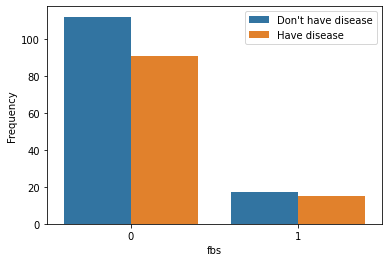

In [226]:
sns.countplot(data=df, x='fbs', hue='num')
plt.ylabel('Frequency')
plt.legend(["Don't have disease", "Have disease"])
plt.show()

**famhist**

This feature is about the person's family history of coronary artery disease (1 = yes; 0 = no)

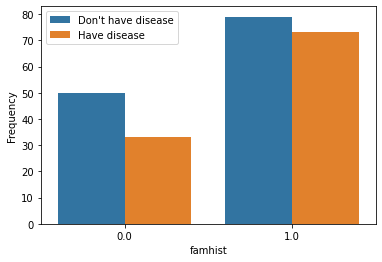

In [227]:
sns.countplot(data=df, x='famhist', hue='num')
plt.ylabel('Frequency')
plt.legend(["Don't have disease", "Have disease"])
plt.show()

From the plot above, the bars of person who has family history of coronary artery disease is overlap, so the difference is not much significance 

**restecg**

This feature is about resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

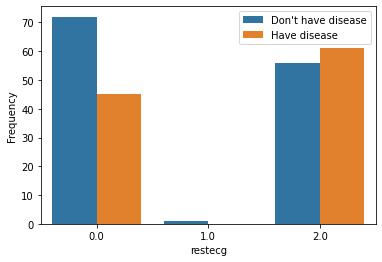

In [228]:
sns.countplot(data=df, x='restecg', hue='num')
plt.ylabel('Frequency')
plt.legend(["Don't have disease", "Have disease"])
plt.show()

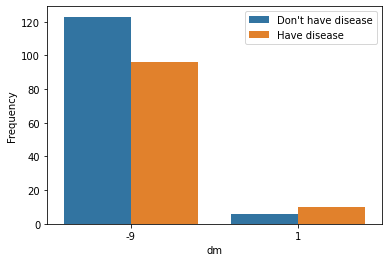

In [229]:
sns.countplot(data=df, x='dm', hue='num')
plt.ylabel('Frequency')
plt.legend(["Don't have disease", "Have disease"])
plt.show()

From the bar chart above, we found that the data contains a lot -9 which is unknown in the data. Therefore, we decide to drop this feature.

**Dropping meaningless column**

In [230]:
df = df.drop('dm',axis=1)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 281
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       235 non-null    int64  
 1   sex       235 non-null    int64  
 2   trestbps  235 non-null    int64  
 3   smoke     235 non-null    float64
 4   cigs      235 non-null    int64  
 5   years     235 non-null    int64  
 6   fbs       235 non-null    int64  
 7   famhist   235 non-null    float64
 8   restecg   235 non-null    float64
 9   ekgmo     235 non-null    float64
 10  ekgday    235 non-null    int64  
 11  ekgyr     235 non-null    int64  
 12  thalach   235 non-null    int64  
 13  thalrest  235 non-null    int64  
 14  tpeakbps  235 non-null    int64  
 15  tpeakbpd  235 non-null    int64  
 16  trestbpd  235 non-null    int64  
 17  num       235 non-null    int64  
dtypes: float64(4), int64(14)
memory usage: 44.9 KB


In [232]:
df.head()

,age,sex,trestbps,smoke,cigs,years,fbs,famhist,restecg,ekgmo,ekgday,ekgyr,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,num
0,63,1,145,1.0,50,20,1,1.0,2.0,2.0,3,81,150,60,190,90,85,0
1,67,1,160,1.0,40,40,0,1.0,2.0,3.0,5,81,108,64,160,90,90,1
2,67,1,120,1.0,20,35,0,1.0,2.0,2.0,19,81,129,78,140,80,80,1
3,37,1,130,0.0,0,0,0,1.0,0.0,2.0,13,81,187,84,195,68,78,0
4,41,0,130,0.0,0,0,0,1.0,2.0,2.0,7,81,172,71,160,74,86,0
